In [20]:
import numpy as np
import scipy.stats
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import beta
import math
import pandas as pd

# 5.3

In [21]:
N = 1000
e =  2.718281
def estimate():
    def g(y):
        return e**(-y/2)*1/2
    xs = g(np.random.uniform(size = N))
    theta_hat = np.mean(xs)
    var = np.var(xs)/N
#     df = pd.DataFrame(theta_hat, var)
    print("Theta_hat:",theta_hat," Variance: ",var)

In [22]:
def estimate_unif_max():
    def g(y):
        return e**(-y)
    xs = g(np.random.uniform(0, 0.5, N))
    var = np.var(xs)/N
    theta_hat = np.mean(xs)*1/2
#     df = pd.DataFrame(theta_hat, var)
    print("Theta_hat:",theta_hat," Variance: ",var)

In [23]:
def estimate_exp():
    def g(y):
        return 1/y
    y = np.random.exponential(scale = 1, size = N) 
    var = np.var(y)/N
    theta_hat = np.mean(y)
#     df = pd.DataFrame(theta_hat, var)
    print("Theta_hat:",theta_hat," Variance: ",var)

In [24]:
estimate()
estimate_unif_max()
estimate_exp()

Theta_hat: 0.3936027048213997  Variance:  3.2357350960027487e-06
Theta_hat: 0.3924372069462392  Variance:  1.2667871385804456e-05
Theta_hat: 1.0094068334589583  Variance:  0.000977081582912376


# 5.13

In [25]:
from scipy.stats import rayleigh
def g(x):
    return (x**2)/(np.sqrt(2*math.pi)*np.exp(-x**2/2))

xs = np.arange(0,10.1,0.1)
ys_g = g(xs)
ys_rayleigh = rayleigh.pdf(xs, 1.5)
ys_norm = norm.pdf(xs, 1.5)
lim =  max(np.r_[ys_g, ys_rayleigh, ys_norm])

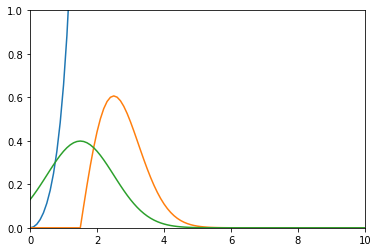

In [26]:
import matplotlib.pyplot as plt
plt.plot(xs, ys_g)
plt.plot(xs, ys_rayleigh)
plt.plot(xs, ys_norm)
plt.ylim(ymin = 0, ymax=1)
plt.xlim(xmin = 0, xmax = 10)
plt.show()

# 5.14

In [27]:
def g(x):
    res = x**2/np.sqrt(2*math.pi)*np.exp(-x**2/2)
    return res

sigma_rayleigh = 1.5
mean = 1.5
n = 10000

def f1(x):
    return rayleigh.pdf(x, sigma_rayleigh)

def f2(x):
    return norm.pdf(x, mean)

def rf1():
    return rayleigh.rvs(sigma_rayleigh, size = n)

def rf2():
    return norm.rvs(mean, size = n)

def is_rayleigh():
    xs = rf1()
    a = g(xs)/f1(xs)
    return np.mean(a)

def is_norm():
    xs = rf2()
    a = g(xs)/f2(xs)
    return np.mean(a)

In [28]:
theta1 = is_rayleigh()
theta2 = is_norm()
print("Theta1:", theta1, " Theta2:", theta2)

Theta1: 0.26690224591299955  Theta2: 0.9896312104041103
